 # Import and Inspect Data

In [47]:
import geopandas as gpd
import fiona

In [51]:
# King County Park Data
parks = gpd.read_file("Data/Parks_in_King_County___park_area.geojson")
parks.head()

OBJECTID  KC_FAC_FID  KCPARKFID                    SITENAME   SITETYPE  \
0         1        7098    4250803                  Beck Place  Park Site   
1         2        2441    4210801            Mirror Lake Park  Park Site   
2         3        8140    5240402  Woodridge Water Tower Park  Park Site   
3         4        2300    4260201                Linwood Park  Park Site   
4         5        2643    5242701            China Creek Park  Park Site   

                 OWNER OWNERTYPE              MANAGER MANAGETYPE  \
0      City of Seattle      City      City of Seattle       City   
1  City of Federal Way      City  City of Federal Way       City   
2     City of Bellevue      City     City of Bellevue       City   
3      City of Kenmore      City      City of Kenmore       City   
4    City of Newcastle      City    City of Newcastle       City   

             MAINTD_BY MAINTTYPE  SHAPE_Length     SHAPE_Area  \
0      City of Seattle      City    375.975174    6289.708880   
1  City of Federal Way      City   1652.556485  148368.730880   
2     City of Bellevue      City    975.371933   61901.873238   
3      City of Kenmore      City   1399.701969   59865.148817   
4    City of Newcastle      City   2808.017874  240589.476195   

                                            geometry  
0  POLYGON ((-122.31190 47.67206, -122.31191 47.6...  
1  POLYGON ((-122.32239 47.32014, -122.32269 47.3...  
2  POLYGON ((-122.17426 47.59293, -122.17424 47.5...  
3  POLYGON ((-122.26859 47.76844, -122.26899 47.7...  
4  POLYGON ((-122.14991 47.52994, -122.14992 47.5...

In [52]:
# boundary for masparks
aoi = gpd.read_file("Data/aoi.geojson")
aoi.head()

geometry
0  POLYGON ((-122.06591 47.83390, -122.51716 47.6...

In [53]:
#  importing gbd data from WA State on water quality
fiona.listlayers("data/WQ_ENV_WQAssessmentCurrent.gdb")

['WQ_ENV_WQAssessmentCurrent_WQAssessmentCurrent_305b',
 'WQ_ENV_WQAssessmentCurrent_WQAssessmentCurrent_303d',
 'WQ_ENV_WQAssessmentCurrent_WQACurrent303d',
 'WQ_ENV_WQAssessmentCurrent_WQACurrent305b']

In [54]:
water303 = gpd.read_file("data/WQ_ENV_WQAssessmentCurrent.gdb",driver='FileGDB',layer=2)
water303.head()

ListingNumber CategoryCode     ParameterName MediumName  \
0          66746            5  Dissolved Oxygen      Water   
1          11253            5       Temperature      Water   
2          42784            5  Dissolved Oxygen      Water   
3          66749            5       Temperature      Water   
4           6310            5       Temperature      Water   

                          ListingWaterbodyName AssessmentUnitNumber  \
0  COLUMBIA RIVER (FRANKLIN D. ROOSEVELT LAKE)   170200011202_01_01   
1            COLUMBIA RIVER (RUFUS WOODS LAKE)   170200050203_01_01   
2            COLUMBIA RIVER (RUFUS WOODS LAKE)   170200050203_01_01   
3            COLUMBIA RIVER (RUFUS WOODS LAKE)   170200050404_01_01   
4                COLUMBIA RIVER (LAKE PATEROS)   170200050405_01_01   

  EnvironmentTypeCode AssessmentUnitTypeCode NHDReachCode  \
0          Freshwater            Large River         None   
1          Freshwater            Large River         None   
2          Freshwater            Large River         None   
3          Freshwater            Large River         None   
4          Freshwater            Large River         None   

   NHDFromMeasurePercent  NHDToMeasurePercent GridCellNumber UnmappableCode  \
0                    NaN                  NaN           None           None   
1                    NaN                  NaN           None           None   
2                    NaN                  NaN           None           None   
3                    NaN                  NaN           None           None   
4                    NaN                  NaN           None           None   

    Shape_Length    Shape_Area  \
0   68935.153361  2.309884e+07   
1   82014.151994  2.890426e+07   
2   82014.151994  2.890426e+07   
3  128281.064431  1.000928e+08   
4  194863.663856  1.269237e+08   

                                            geometry  
0  MULTIPOLYGON (((2329871.876 1350388.059, 23298...  
1  MULTIPOLYGON (((2014376.815 989383.467, 201448...  
2  MULTIPOLYGON (((2014376.815 989383.467, 201448...  
3  MULTIPOLYGON (((1885764.959 1004898.943, 18858...  
4  MULTIPOLYGON (((1830876.837 1007031.725, 18311...

# Projections of data

In [56]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
aoi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
water303.crs

<Derived Projected CRS: EPSG:2927>
Name: NAD83(HARN) / Washington South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Washington - counties of Adams; Asotin; Benton; Clark; Columbia; Cowlitz; Franklin; Garfield; Grant south of approximately 47°30'N; Grays Harbor; Kittitas; Klickitat; Lewis; Mason; Pacific; Pierce; Skamania; Thurston; Wahkiakum; Walla Walla; Whitman; Yakima.
- bounds: (-124.4, 45.54, -116.91, 47.61)
Coordinate Operation:
- name: SPCS83 Washington South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [64]:
# convert water data to same crs as parks county park and aoi
water303 = water303.to_crs(4326)
water303.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# clip data

In [62]:
# clip king county park data with aoi
parks_clip = parks.clip(aoi)

In [66]:
# clip water data with aoi
water303_clip = water303.clip(aoi)

<AxesSubplot:>

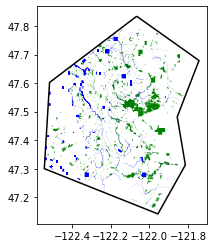

In [67]:
base = parks_clip.plot(color="green")
water303_clip.plot(ax=base,color="blue")
aoi.boundary.plot(ax=base,color="black")